In [61]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import tqdm

In [14]:
sys.path.append('/mnt/g/My Drive/Projects/OFC/src')
import grid
import grid_updaters
import output_statistics

In [94]:
import importlib
importlib.reload(grid)
importlib.reload(grid_updaters)


<module 'grid_updaters' from '/mnt/g/My Drive/Projects/OFC/src/grid_updaters.py'>

In [95]:
updater = grid_updaters.NNCoulombFrictionUpdater(f_s=10,
                                                 increment=3,
                                                 alpha=0,
                                                #  site_updater=grid_updaters._nn_update_ij_on_finite_bc,
                                                 site_updater=grid_updaters._nn_update_ij_on_circular_bc,
                                                 )
simple_grid = grid.BaseGrid(200, updater=updater)

In [96]:
updater.avalanche_details

{}

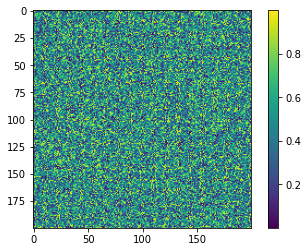

In [97]:
plt.figure()
plt.imshow(simple_grid.grid)
plt.colorbar()

In [98]:
%pdb 1
steps_in_iteration = 100
total_iterations = 10
n_sites = np.array([])
for iter in tqdm.tqdm_notebook(range(total_iterations)):
    n_sites = np.append(n_sites, simple_grid.run_n_steps(steps_in_iteration))
    simple_grid.clear_cache()

Automatic pdb calling has been turned ON


/tmp/ipykernel_659/3735572843.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for iter in tqdm.tqdm_notebook(range(total_iterations)):


  0%|          | 0/10 [00:00<?, ?it/s]

0
0
0
0


AssertionError: Sum of stess on grid exceeds maximal capacity

> /mnt/g/My Drive/Projects/OFC/src/grid_updaters.py(39)update_grid()
     37 
     38         """        
---> 39         assert (grid.sum() < (grid.size * self.f_s)), "Sum of stess on grid exceeds maximal capacity"
     40         exceed_logical = grid>=self.f_s
     41         if np.any(exceed_logical):



In [ ]:
sizes, times = output_statistics.n_sites_to_avalanche_size_and_time(n_sites)

In [ ]:
sizes

array([40726,   615,   618,   587,   687,   778,   990,  1275])

In [ ]:
n_sites

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1019, 3111, 4258, 4574, 4545, 4232, 3781, 3166,
       2702, 2385, 2099, 1669, 1317,  949,  499,  241,  107,   51,   14,
          4,    2,    1,    0,  514,   46,   24,   18,    9,    3,    1,
          0,  459,   57,   34,   27,   14,   11,    9,    6,    1,    0,
        482,   53,   24,   13,    4,    4,    4,    3,    0,  510,   67,
         43,   31,   23,    7,    4,    2,    0,  5

In [ ]:
from scipy import ndimage
connected_compon, n_comp = ndimage.label(n_sites)

In [ ]:
connected_compon

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9], dtype=int32)

In [ ]:
np.argwhere(connected_compon==1).ravel()

array([ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112])

In [ ]:
np.where(connected_compon[:,None]==1)

(array([ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
avalanche_size = []
avalanche_time = []
for i in range(1,n_comp):
    avalanche_size.append(n_sites[connected_compon==i].sum())
    avalanche_time.append(np.argwhere(connected_compon==i).ravel()[0])
avalanche_size = np.array(avalanche_size)
avalanche_time = np.array(avalanche_time)

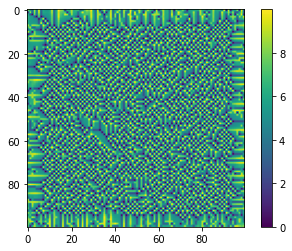

In [ ]:
plt.figure()
plt.imshow(simple_grid.cache[:,:,-1])
plt.colorbar()